# Введение в глубинное обучение, ФКН ВШЭ

## Домашнее задание 2. Классификация изображений. Сверточные нейронные сети.

### Общая информация

Дата выдачи: 07.11.2021

Мягкий дедлайн: 23:59MSK 28.11.2021

Жесткий дедлайн: 23:59MSK 02.12.2021

Оценка после штрафа после мягкого дедлайна вычисляется по формуле $M_{penalty} = M_{full} \cdot 0.85^{t/1440}$, где $M_{full}$ — полная оценка за работу без учета штрафа, а $t$ — время в минутах, прошедшее после мягкого дедлайна (округление до двух цифр после запятой). Таким образом, спустя первые сутки после мягкого дедлайна вы не можете получить оценку выше 8.5, а если сдать перед самым жестким дедлайном, то ваш максимум — 5.22 балла.

### Оценивание и штрафы

Максимально допустимая оценка за работу — 10 баллов. Сдавать задание после указанного срока сдачи нельзя.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов. Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке. Также оценка может быть снижена за плохо читаемый код и плохо оформленные графики. Все ответы должны сопровождаться кодом или комментариями о том, как они были получены.

### О задании

В этом задании потребуется обучить классификатор изображений. Будем работать с датасетом, название которого раскрывать не будем. Можете посмотреть самостоятельно на картинки, которые в есть датасете. В нём 200 классов и около 5 тысяч картинок на каждый класс. Классы пронумерованы, как нетрудно догадаться, от 0 до 199. Скачать датасет можно вот [тут](https://www.dropbox.com/s/33l8lp62rmvtx40/dataset.zip?dl=0).

Структура датасета простая -- есть директории train/ и val/, в которых лежат обучающие и валидационные данные. В train/ и val/ лежат директориии, соответствующие классам изображений, в которых лежат, собственно, сами изображения.

## Задание 1. (Максимум 10 баллов + 5 бонусных баллов)

__Необходимо выполнить любое из двух заданий (на выбор)__

1) Добейтесь accuracy **на валидации не менее 0.44**. В этом задании **запрещено** пользоваться предобученными моделями и ресайзом картинок. 

2) Добейтесь accuracy **на валидации не менее 0.84**. В этом задании делать ресайз и использовать претрейн можно. 

Обязательно указывайте ссылки на чужой код, если вы его используете. Обязательно ссылайтесь на статьи / блогпосты / вопросы на stackoverflow / видосы от ютуберов-машинлернеров / курсы / подсказки от Дяди Васи и прочие дополнительные материалы, если вы их используете. 

Ваш код обязательно должен проходить все `assert`'ы ниже.

Необходимо написать функции `train_one_epoch`, `train` и `predict` по шаблонам ниже (во многом повторяют примеры с семинаров). Обратите особое внимание на функцию `predict`: она должна возвращать список лоссов по всем объектам даталоадера, список предсказанных классов для каждого объекта из даталоалера и список настоящих классов для каждого объекта в даталоадере (и именно в таком порядке).

__Использовать внешние данные для обучения строго запрещено в обоих заданиях. Также запрещено обучаться на валидационной выборке__.


__Критерии оценки__: Оценка вычисляется по простой формуле: `min(10, 10 * Ваша accuracy / 0.44)` для первого задания и `min(10, 10 * (Ваша accuracy - 0.5) / 0.34)` для второго. Оценка округляется до десятых по арифметическим правилам. Если вы выполнили оба задания, то берется максимум из двух оценок.

__Бонус__. Вы получаете 5 бонусных баллов если справляетесь с обоими заданиями на 10 баллов (итого 15 баллов). В противном случае выставляется максимальная из двух оценок и ваш бонус равен нулю.

__Советы и указания__:
 - Наверняка вам потребуется много гуглить о классификации и о том, как заставить её работать. Это нормально, все гуглят. Но не забывайте, что нужно быть готовым за скатанный код отвечать :)
 - Используйте аугментации. Для этого пользуйтесь модулем `torchvision.transforms` или библиотекой [albumentations](https://github.com/albumentations-team/albumentations)
 - Можно обучать с нуля или файнтюнить (в зависимости от задания) модели из `torchvision`.
 - Рекомендуем написать вам сначала класс-датасет (или воспользоваться классом `ImageFolder`), который возвращает картинки и соответствующие им классы, а затем функции для трейна по шаблонам ниже. Однако делать это мы не заставляем. Если вам так неудобно, то можете писать код в удобном стиле. Однако учтите, что чрезмерное изменение нижеперечисленных шаблонов увеличит количество вопросов к вашему коду и повысит вероятность вызова на защиту :)
 - Валидируйте. Трекайте ошибки как можно раньше, чтобы не тратить время впустую.
 - Чтобы быстро отладить код, пробуйте обучаться на маленькой части датасета (скажем, 5-10 картинок просто чтобы убедиться что код запускается). Когда вы поняли, что смогли всё отдебажить, переходите обучению по всему датасету
 - На каждый запуск делайте ровно одно изменение в модели/аугментации/оптимайзере, чтобы понять, что и как влияет на результат.
 - Фиксируйте random seed.
 - Начинайте с простых моделей и постепенно переходите к сложным. Обучение лёгких моделей экономит много времени.
 - Ставьте расписание на learning rate. Уменьшайте его, когда лосс на валидации перестаёт убывать.
 - Советуем использовать GPU. Если у вас его нет, используйте google colab. Если вам неудобно его использовать на постоянной основе, напишите и отладьте весь код локально на CPU, а затем запустите уже написанный ноутбук в колабе. Авторское решение задания достигает требуемой точности в колабе за 45 минут обучения.
 
Good luck & have fun! :)

In [1]:
import random
import numpy as np
import torch
import torchvision
import tqdm
from torch import nn
from torch.nn import functional as F
from sklearn.metrics import accuracy_score
import warnings
from tqdm import tqdm_notebook
import matplotlib.pyplot as plt
from IPython.display import clear_output
import torchvision.transforms as T

warnings.filterwarnings('ignore')
# You may add any imports you need

In [4]:
!wget https://www.dropbox.com/s/33l8lp62rmvtx40/dataset.zip?dl=1 -O dataset.zip && unzip -q dataset.zip

--2021-12-05 08:36:12--  https://www.dropbox.com/s/33l8lp62rmvtx40/dataset.zip?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6021:18::a27d:4112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/dl/33l8lp62rmvtx40/dataset.zip [following]
--2021-12-05 08:36:13--  https://www.dropbox.com/s/dl/33l8lp62rmvtx40/dataset.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc8bc650e052132d09719a81f251.dl.dropboxusercontent.com/cd/0/get/BbTf6LVCLv1RZ266BsGgFxbRdanznwQIlr_LZeDEBsW5fYVUsvetmqS61qyqDyxoRKkpP8UFjWo60Xpt91pUX2-gSugyV1l6O0OD1bz2QqNozHEx90W9JLL2NSIawa59kgCU75kCkwWo1nM_-tqc2TzL/file?dl=1# [following]
--2021-12-05 08:36:13--  https://uc8bc650e052132d09719a81f251.dl.dropboxusercontent.com/cd/0/get/BbTf6LVCLv1RZ266BsGgFxbRdanznwQIlr_LZeDEBsW5fYVUsvetmqS61qyqDyxoRKkpP8UFjWo60Xpt91pUX2-gSu

### Подготовка данных

In [5]:
train_transform = T.Compose([
            T.RandomGrayscale(0.2),
            T.RandomVerticalFlip(0.2),
            T.RandomHorizontalFlip(0.2),
            T.RandomPerspective(0.1),
            T.RandomRotation(15),
            T.ToTensor(),
            T.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])

val_transform = T.Compose([
            T.ToTensor(),
            T.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])

train_dataset = torchvision.datasets.ImageFolder("./dataset/dataset/train", transform=train_transform)
val_dataset = torchvision.datasets.ImageFolder("./dataset/dataset/val", transform=val_transform)

train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size = 64, shuffle=True, num_workers=2)
val_dataloader = torch.utils.data.DataLoader(val_dataset, batch_size = 500, shuffle=False, num_workers=2)

In [6]:
# Just very simple sanity checks
assert isinstance(train_dataset[0], tuple)
assert len(train_dataset[0]) == 2
assert isinstance(train_dataset[1][1], int)
print("tests passed")

tests passed


### Обучение модели

In [7]:
## взята с семинара https://github.com/isadrtdinov/intro-to-dl-hse/blob/main/seminars/193/seminar-02-03-convnets.ipynb

def plot_losses(train_losses, val_losses, train_accuracies, val_accuracies):
    clear_output()
    fig, axs = plt.subplots(1, 2, figsize=(13, 4))
    axs[0].plot(range(1, len(train_losses) + 1), train_losses, label='train')
    axs[0].plot(range(1, len(val_losses) + 1), val_losses, label='val')
    axs[0].set_ylabel('loss')

    axs[1].plot(range(1, len(train_accuracies) + 1), train_accuracies, label='train')
    axs[1].plot(range(1, len(val_accuracies) + 1), val_accuracies, label='val')
    axs[1].set_ylabel('accuracy')

    for ax in axs:
        ax.grid()
        ax.set_xlabel('epoch')
        ax.legend()

    plt.show()

In [8]:
## основы функций были взяты с семинаров групп 192 193 https://github.com/isadrtdinov/intro-to-dl-hse/tree/main/seminars

def train(model, train_dataloader, val_dataloader, criterion, optimizer, device="cuda:0", n_epochs=10, scheduler=None):
    train_losses, val_losses, train_accuracies, val_accuracies = [], [], [], []
    for epoch in range(n_epochs):
        train_one_epoch(model, train_dataloader, criterion, optimizer, device)
        train_loss, train_acc = evaluate(model, train_dataloader, criterion, device)
        val_loss, val_acc = evaluate(model, val_dataloader, criterion, device)
        
        train_losses.append(train_loss)
        val_losses.append(val_loss)
        train_accuracies.append(train_acc)
        val_accuracies.append(val_acc)

        plot_losses(train_losses, val_losses, train_accuracies, val_accuracies)
        print("Val loss = {:.4f}".format(val_loss), "Val accuracy = {:.4f}".format(val_acc))

    
    
def train_one_epoch(model, train_dataloader, criterion, optimizer, device):
    progress_bar = tqdm_notebook(train_dataloader)
    model = model.to(device).train()
    idx = 0
    cum_loss = 0
    for (images, labels) in progress_bar:
        images, labels = images.to(device), labels.to(device)
        preds = model(images)
        loss = criterion(preds, labels)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        if idx % 10 == 0:
            progress_bar.set_description("Loss = {:.4f}".format(loss.item()))
        idx += 1
        cum_loss += loss.item()

    if scheduler is not None:
        scheduler.step(loss)

        
        
def evaluate(model, val_dataloader, criterion, device="cuda:0"):
    cumulative_loss = 0
    acc = 0
    model = model.to(device).eval()
    with torch.no_grad():
        for idx, (images, labels) in enumerate(val_dataloader): 
            images, labels = images.to(device), labels.to(device)
            preds = model(images)
            loss = criterion(preds, labels)
            cumulative_loss += loss.item()
            acc += (preds.argmax(1) == labels).float().mean().item()
            
    return cumulative_loss / (idx + 1), acc / (idx + 1)


def predict(model, val_dataloder, criterion, device="cuda:0"):
    model.to(device).eval()
    pred = torch.tensor([]).to(device)
    true = torch.tensor([]).to(device)
    for images, labels in val_dataloader:
        images = images.to(device)
        labels = labels.to(device)
        with torch.no_grad():
            preds = model(images)
            loss = criterion(preds, labels)
        pred = torch.cat([pred, preds.argmax(dim=-1)])
        true = torch.cat([true, labels])
        
    return loss, pred, true

In [3]:
from torchvision.models import resnet18
resnet18()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [10]:
from torchvision.models import resnet18

def set_random_seed(seed):
    torch.backends.cudnn.deterministic = True
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    np.random.seed(seed)
    random.seed(seed)

set_random_seed(68)


train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size = 64, shuffle=True, num_workers=2)
val_dataloader = torch.utils.data.DataLoader(val_dataset, batch_size = 500, shuffle=False, num_workers=2)

model = resnet18(pretrained=False, num_classes=200)

"""
Модель нетренированная, по правилам как я понял не запрещено просто взять по сути ее архитектуру только, 
чтобы не писать с нуля, Аким тоже сказал так можно.
"""
print()

In [11]:
optimizer = torch.optim.Adam(model.parameters(), 1e-3)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, patience=2)
criterion = nn.CrossEntropyLoss()
n_epochs = 26

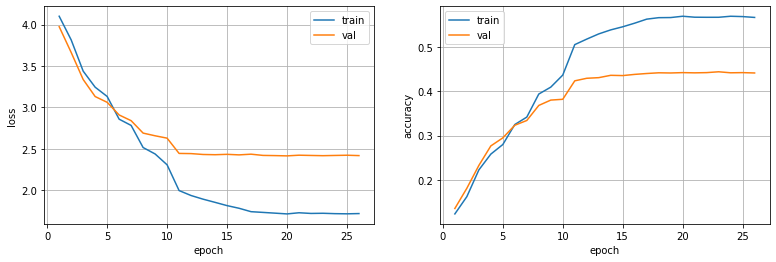

Val loss = 2.4188 Val accuracy = 0.4419


In [12]:
train(model, train_dataloader,
      val_dataloader, criterion,
      optimizer, n_epochs=n_epochs,
      scheduler=scheduler)

In [17]:
device="cuda:0"
all_losses, predicted_labels, true_labels = predict(model, val_dataloader, criterion, device)
assert len(predicted_labels) == len(val_dataset)
print("tests passed")

tests passed


### Проверка полученной accuracy

После всех экспериментов которые вы проделали, выберите лучшую из своих моделей, реализуйте и запустите функцию `evaluate`. Эта функция должна брать на вход модель и даталоадер с валидационными данными и возврашать accuracy, посчитанную на этом датасете.

In [16]:
device="cuda:0"
all_losses, predicted_labels, true_labels = predict(model, val_dataloader, criterion, device)
assert len(predicted_labels) == len(val_dataset)
accuracy = accuracy_score(true_labels.cpu(), predicted_labels.cpu())
print(f'Оценка за это задание составит {np.clip(10 * accuracy / 0.44, 0, 10):.2f} баллов,'\
      f' если вы делали часть 1, и {np.clip(10 * (accuracy - 0.5) / 0.34, 0, 10):.2f} баллов,'\
      f' если вы делали часть 2.')

Оценка за это задание составит 10.00 баллов, если вы делали часть 1, и 0.00 баллов, если вы делали часть 2.


## Задание 2 (0 баллов, но при невыполнении максимум за все задание — 0 баллов)

Напишите небольшой отчет о том, как вы добились полученного качества: какие средства использовали и какие эксперименты проводили. Подробно расскажите об архитектурах и значениях гиперпараметров, а также какие метрики на тесте они показывали. Чтобы отчет был зачтен, необходимо привести хотя бы 3 эксперимента.

За основу решения был взят пример с семинара 192 и 193 группы по данной теме. Он содержал в себе основные необходимые функции для построения базовой модели, с помощью которой была получено базовое значение accuracy **0.25**

Далее в качестве архитектуры модели я взял архитектуру resnet18. С ее помощью была получена accuracy **0.35**

Для достижения accuracy **0.42** была добавлена аугментация:

*   RandomGrayscale() - перевод изображения в оттенки серого
*   RandomVerticalFlip() - случайный вертикальный поворот изображения
*   RandomHorizontalFlip() - случайный горизонтальный поворот изображения
*   RandomPerspective() - случайное изменение перспективы
*   RandomRotation() - случайный поворот картинки

Финальная accuracy **0.44** была получена с помощью подборов параметров вышеописанных функций.

В качестве optimizer использовался **Adam**, scheduler - **ReduceLROnPlateau**, а criterion - **CrossEntropyLoss**.